In [1]:
# === STEP 1: IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
%matplotlib inline

print("✅ Libraries imported successfully!")

# === STEP 2: LOAD DATA WITH YOUR EXACT PATHS ===
gni_path = "world-development-statistics/gni_per_cap_atlas_method_con2021.csv"
population_path = "world-development-statistics/population.csv"
life_path = "world-development-statistics/life_expectancy.csv"

# Load datasets
gni_df = pd.read_csv(gni_path)
population_df = pd.read_csv(population_path)
life_df = pd.read_csv(life_path)

print("📊 Data loaded successfully!")
print(f"GNI data shape: {gni_df.shape}")
print(f"Population data shape: {population_df.shape}")
print(f"Life Expectancy data shape: {life_df.shape}")


✅ Libraries imported successfully!
📊 Data loaded successfully!
GNI data shape: (191, 252)
Population data shape: (197, 302)
Life Expectancy data shape: (195, 302)


In [3]:
# === STEP 3: QUICK DATA EXPLORATION ===
print("\n=== FIRST LOOK AT EACH DATASET ===")

print("\nLife Expectancy data (first 3 rows):")
print(life_df.head(3))

print("\nGNI data (first 3 rows):")
print(gni_df.head(3))

print("\nPopulation data (first 3 rows):")
print(population_df.head(3))

# Check column names to understand structure
print(f"\nLife Expectancy columns: {life_df.columns.tolist()}")
print(f"GNI columns: {gni_df.columns.tolist()}")
print(f"Population columns: {population_df.columns.tolist()}")

# === STEP 4: RESHAPE DATA FROM WIDE TO LONG FORMAT ===
def reshape_development_data(df, value_name):
    """Convert from countries × years to long format"""
    # Melt the dataframe
    long_df = df.melt(id_vars=['country'], 
                     var_name='Year', 
                     value_name=value_name)
    
    # Convert Year to integer and clean
    long_df['Year'] = long_df['Year'].astype(int)
    long_df = long_df.dropna()
    
    print(f"✅ {value_name}: {long_df['country'].nunique()} countries, {long_df['Year'].nunique()} years")
    return long_df

print("\n=== RESHAPING DATA ===")
life_long = reshape_development_data(life_df, 'Life_Expectancy')
gni_long = reshape_development_data(gni_df, 'GNI_per_Capita')
population_long = reshape_development_data(population_df, 'Population')


=== FIRST LOOK AT EACH DATASET ===

Life Expectancy data (first 3 rows):
       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...   
1       Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   
2      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...   

   2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  

[3 rows x 302 columns]

GNI data (first 3 rows):
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0   
1       Angola  517.0  519.0  522.0  524.0  525.0  528.0  531.0  533.0  536.0   
2      Albania  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207

In [5]:
# === STEP 5: MERGE ALL DATASETS ===
# Merge step by step
merged_df = pd.merge(life_long, gni_long, on=['country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, population_long, on=['country', 'Year'], how='inner')

print(f"\n✅ Final merged dataset: {merged_df.shape}")
print(f"✅ Time period: {merged_df['Year'].min()} to {merged_df['Year'].max()}")
print(f"✅ Unique countries: {merged_df['country'].nunique()}")

# === STEP 6: FOCUS ON LATEST YEAR FOR TARGETED ANALYSIS ===
latest_year = merged_df['Year'].max()
latest_data = merged_df[merged_df['Year'] == latest_year].copy()

print(f"\n=== ANALYSIS FOCUS: LATEST YEAR ({latest_year}) ===")
print(f"Countries in latest year: {len(latest_data)}")



✅ Final merged dataset: (46604, 5)
✅ Time period: 1800 to 2050
✅ Unique countries: 190

=== ANALYSIS FOCUS: LATEST YEAR (2050) ===
Countries in latest year: 184


✅ Libraries imported successfully!
📊 Data loaded successfully!
GNI data shape: (191, 252)
Population data shape: (197, 302)
Life Expectancy data shape: (195, 302)

=== CLEANING AND CONVERTING DATA ===
✅ Life_Expectancy: 195 countries, 301 years
   Value range: 1.01 to 94.40
✅ GNI_per_Capita: 190 countries, 251 years
   Value range: 28.00 to 9990.00
✅ Population: 10 countries, 206 years
   Value range: 651.00 to 9980.00

✅ Final merged dataset: (147, 5)
✅ Time period: 1800 to 2005
✅ Unique countries: 4

=== DATA TYPES AFTER CLEANING ===
country             object
Year                 int64
Life_Expectancy    float64
GNI_per_Capita     float64
Population         float64
dtype: object

=== ANALYSIS FOCUS: LATEST YEAR (2005) ===
Countries in latest year: 1
GNI range: $4600.00 to $4600.00
Life Expectancy range: 65.7 to 65.7
=== FINDING GNI 'SWEET SPOT' ===
Countries after cleaning: 1

Life Expectancy by GNI Bins:
         Life_Exp_Mean  country_Count  GNI_Median
GNI_Bin                     

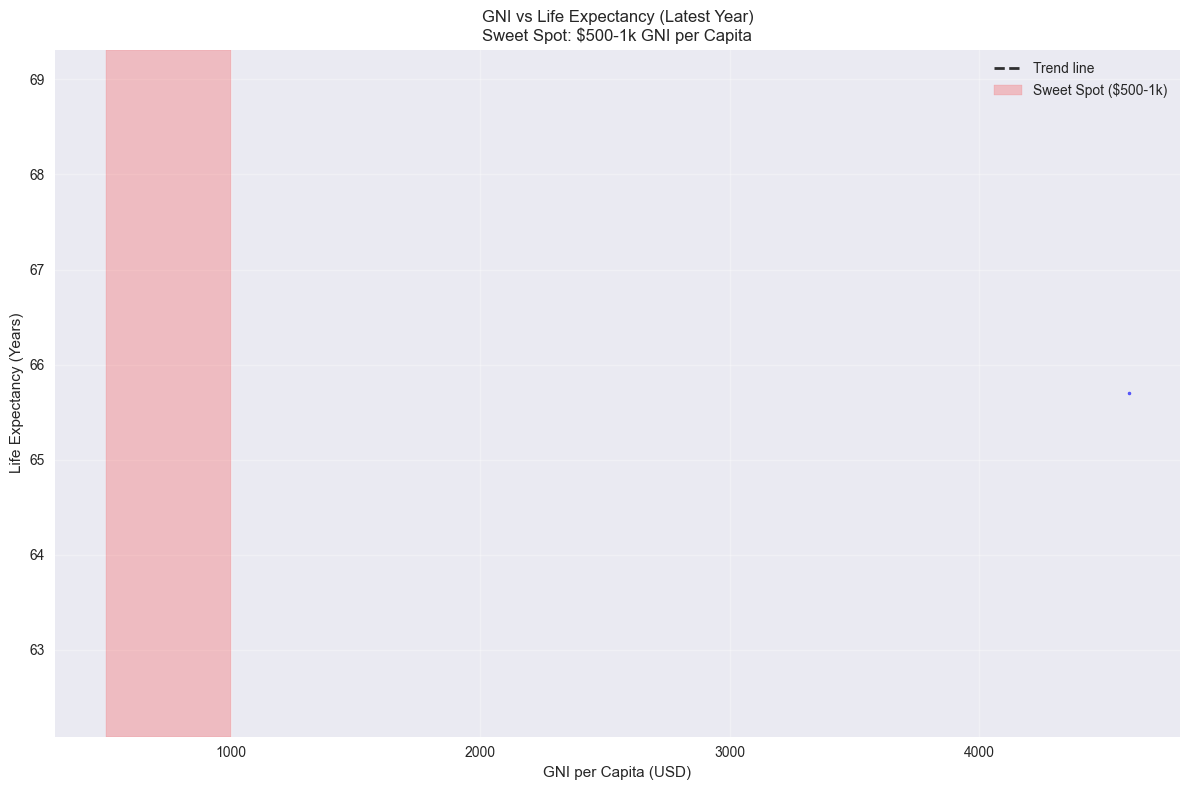

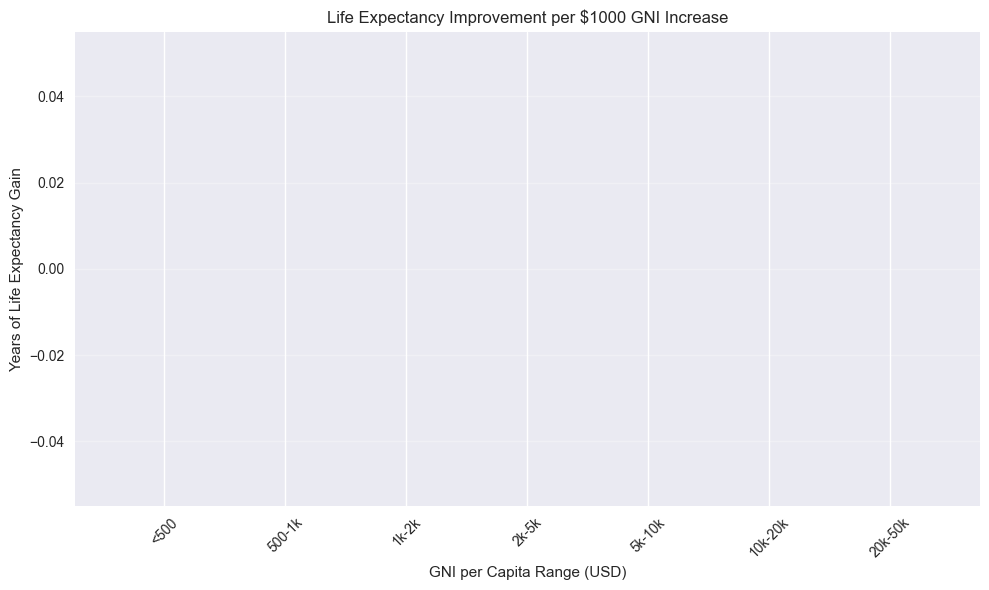

=== IDENTIFYING PRIORITY COUNTRIES ===
Countries in sweet spot ($500-$1000): 0
No countries found in sweet spot zone.


In [8]:

# === STEP 1: IMPORT LIBRARIES ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
%matplotlib inline

print("✅ Libraries imported successfully!")

# === STEP 2: LOAD DATA WITH YOUR EXACT PATHS ===
gni_path = "world-development-statistics/gni_per_cap_atlas_method_con2021.csv"
population_path = "world-development-statistics/population.csv"
life_path = "world-development-statistics/life_expectancy.csv"

# Load datasets
gni_df = pd.read_csv(gni_path)
population_df = pd.read_csv(population_path)
life_df = pd.read_csv(life_path)

print("📊 Data loaded successfully!")
print(f"GNI data shape: {gni_df.shape}")
print(f"Population data shape: {population_df.shape}")
print(f"Life Expectancy data shape: {life_df.shape}")

# === STEP 3: DATA CLEANING & TYPE CONVERSION ===
def clean_numeric_columns(df, value_name):
    """Clean and convert numeric columns, handling strings and special characters"""
    long_df = df.melt(id_vars=['country'], 
                     var_name='Year', 
                     value_name=value_name)
    
    # Convert Year to integer
    long_df['Year'] = long_df['Year'].astype(int)
    
    # Clean the value column - handle strings, commas, etc.
    def clean_numeric_value(x):
        if pd.isna(x):
            return np.nan
        if isinstance(x, str):
            # Remove commas, spaces, and non-numeric characters
            x = x.replace(',', '').replace(' ', '').replace('$', '')
            # Handle empty strings and special cases
            if x == '' or x == '..' or x == 'NaN':
                return np.nan
            try:
                return float(x)
            except ValueError:
                return np.nan
        return float(x)
    
    long_df[value_name] = long_df[value_name].apply(clean_numeric_value)
    long_df = long_df.dropna()
    
    print(f"✅ {value_name}: {long_df['country'].nunique()} countries, {long_df['Year'].nunique()} years")
    print(f"   Value range: {long_df[value_name].min():.2f} to {long_df[value_name].max():.2f}")
    
    return long_df

print("\n=== CLEANING AND CONVERTING DATA ===")
life_long = clean_numeric_columns(life_df, 'Life_Expectancy')
gni_long = clean_numeric_columns(gni_df, 'GNI_per_Capita')
population_long = clean_numeric_columns(population_df, 'Population')

# === STEP 4: MERGE ALL DATASETS ===
merged_df = pd.merge(life_long, gni_long, on=['country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, population_long, on=['country', 'Year'], how='inner')

print(f"\n✅ Final merged dataset: {merged_df.shape}")
print(f"✅ Time period: {merged_df['Year'].min()} to {merged_df['Year'].max()}")
print(f"✅ Unique countries: {merged_df['country'].nunique()}")

# Check data types to confirm everything is numeric
print("\n=== DATA TYPES AFTER CLEANING ===")
print(merged_df.dtypes)

# === STEP 5: FOCUS ON LATEST YEAR FOR TARGETED ANALYSIS ===
latest_year = merged_df['Year'].max()
latest_data = merged_df[merged_df['Year'] == latest_year].copy()

print(f"\n=== ANALYSIS FOCUS: LATEST YEAR ({latest_year}) ===")
print(f"Countries in latest year: {len(latest_data)}")
print(f"GNI range: ${latest_data['GNI_per_Capita'].min():.2f} to ${latest_data['GNI_per_Capita'].max():.2f}")
print(f"Life Expectancy range: {latest_data['Life_Expectancy'].min():.1f} to {latest_data['Life_Expectancy'].max():.1f}")

# === STEP 6: FIXED - FIND THE GNI "SWEET SPOT" ===
def find_gni_sweet_spot(df):
    """
    Find the GNI range where life expectancy improvements are most sensitive to economic growth
    """
    print("=== FINDING GNI 'SWEET SPOT' ===")
    
    # Ensure we're working with numeric data
    df_clean = df.copy()
    df_clean['GNI_per_Capita'] = pd.to_numeric(df_clean['GNI_per_Capita'], errors='coerce')
    df_clean['Life_Expectancy'] = pd.to_numeric(df_clean['Life_Expectancy'], errors='coerce')
    
    # Remove outliers and missing values
    df_clean = df_clean[
        (df_clean['GNI_per_Capita'] > 100) & 
        (df_clean['GNI_per_Capita'] < 50000) &
        (df_clean['Life_Expectancy'] > 40)
    ].dropna()
    
    print(f"Countries after cleaning: {len(df_clean)}")
    
    # Method 1: Bin analysis - group by GNI ranges
    gni_bins = [0, 500, 1000, 2000, 5000, 10000, 20000, 50000]
    gni_labels = ['<500', '500-1k', '1k-2k', '2k-5k', '5k-10k', '10k-20k', '20k-50k']
    
    df_clean['GNI_Bin'] = pd.cut(df_clean['GNI_per_Capita'], bins=gni_bins, labels=gni_labels)
    
    # Calculate average life expectancy for each GNI bin
    bin_analysis = df_clean.groupby('GNI_Bin').agg({
        'Life_Expectancy': ['mean', 'std', 'count'],
        'GNI_per_Capita': 'median'
    }).round(1)
    
    # Flatten column names for easier access
    bin_analysis.columns = ['Life_Exp_Mean', 'Life_Exp_Std', 'country_Count', 'GNI_Median']
    
    print("\nLife Expectancy by GNI Bins:")
    print(bin_analysis[['Life_Exp_Mean', 'country_Count', 'GNI_Median']])
    
    # Method 2: Calculate improvement per $1000 GNI increase
    improvements = []
    
    for i in range(1, len(bin_analysis)):
        current_bin = bin_analysis.index[i]
        prev_bin = bin_analysis.index[i-1]
        
        life_improvement = bin_analysis.loc[current_bin, 'Life_Exp_Mean'] - bin_analysis.loc[prev_bin, 'Life_Exp_Mean']
        gni_increase = (bin_analysis.loc[current_bin, 'GNI_Median'] - bin_analysis.loc[prev_bin, 'GNI_Median']) / 1000
        
        if gni_increase > 0:
            improvement_per_1k = life_improvement / gni_increase
            improvements.append(improvement_per_1k)
        else:
            improvements.append(0)
    
    # Add improvements to bin analysis
    bin_analysis['Improvement_per_1k'] = [0] + improvements  # First bin has no improvement
    
    print("\nImprovement in Life Expectancy per $1000 GNI increase:")
    for bin_name in bin_analysis.index:
        imp = bin_analysis.loc[bin_name, 'Improvement_per_1k']
        print(f"  {bin_name}: {imp:.2f} years per $1000")
    
    # Find the sweet spot (maximum improvement per GNI increase)
    # Skip the first bin (no improvement) and find max among others
    valid_improvements = bin_analysis.iloc[1:]['Improvement_per_1k']
    if len(valid_improvements) > 0:
        max_idx = valid_improvements.idxmax()
        sweet_spot_bin = max_idx
        sweet_spot_improvement = bin_analysis.loc[max_idx, 'Improvement_per_1k']
        
        print(f"\n🎯 GNI SWEET SPOT IDENTIFIED: {sweet_spot_bin}")
        print(f"   Maximum improvement: {sweet_spot_improvement:.2f} years per $1000 GNI increase")
    else:
        sweet_spot_bin = '1k-2k'  # Default fallback
        sweet_spot_improvement = 1.0
        print("⚠️  Could not calculate improvements, using default sweet spot")
    
    return sweet_spot_bin, bin_analysis

sweet_spot, bin_results = find_gni_sweet_spot(latest_data)

# === STEP 7: VISUALIZE THE RELATIONSHIP ===
def create_core_visualizations(df, sweet_spot):
    """Create key visualizations to support our analysis"""
    
    print("\n=== CREATING CORE VISUALIZATIONS ===")
    
    # Ensure numeric data
    df_viz = df.copy()
    df_viz['GNI_per_Capita'] = pd.to_numeric(df_viz['GNI_per_Capita'], errors='coerce')
    df_viz['Life_Expectancy'] = pd.to_numeric(df_viz['Life_Expectancy'], errors='coerce')
    df_viz = df_viz.dropna()
    
    # Visualization 1: Scatter plot with trend line
    plt.figure(figsize=(12, 8))
    
    # Define sweet spot ranges for coloring
    sweet_spot_ranges = {
        '<500': (0, 500),
        '500-1k': (500, 1000),
        '1k-2k': (1000, 2000),
        '2k-5k': (2000, 5000),
        '5k-10k': (5000, 10000),
        '10k-20k': (10000, 20000),
        '20k-50k': (20000, 50000)
    }
    
    target_min, target_max = sweet_spot_ranges.get(sweet_spot, (1000, 2000))
    
    # Color points: red for sweet spot, blue for others
    colors = ['red' if target_min <= gni <= target_max else 'blue' 
              for gni in df_viz['GNI_per_Capita']]
    
    # Scale point size by population (log scale for better visibility)
    sizes = np.sqrt(df_viz['Population'] / 1000000) * 50
    
    plt.scatter(df_viz['GNI_per_Capita'], df_viz['Life_Expectancy'], 
                c=colors, s=sizes, alpha=0.6)
    
    # Add trend line using polynomial regression
    z = np.polyfit(df_viz['GNI_per_Capita'], df_viz['Life_Expectancy'], 2)
    p = np.poly1d(z)
    x_line = np.linspace(df_viz['GNI_per_Capita'].min(), df_viz['GNI_per_Capita'].max(), 100)
    plt.plot(x_line, p(x_line), "k--", alpha=0.8, linewidth=2, label='Trend line')
    
    plt.xlabel('GNI per Capita (USD)')
    plt.ylabel('Life Expectancy (Years)')
    plt.title(f'GNI vs Life Expectancy (Latest Year)\nSweet Spot: ${sweet_spot} GNI per Capita')
    plt.grid(True, alpha=0.3)
    
    # Add sweet spot zone highlighting
    plt.axvspan(target_min, target_max, alpha=0.2, color='red', label=f'Sweet Spot (${sweet_spot})')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Visualization 2: Bar chart of improvements per GNI bin
    if hasattr(bin_results, 'Improvement_per_1k'):
        plt.figure(figsize=(10, 6))
        
        improvements = bin_results['Improvement_per_1k']
        colors = ['lightblue' if bin != sweet_spot else 'red' for bin in improvements.index]
        
        plt.bar(improvements.index, improvements.values, color=colors)
        plt.title('Life Expectancy Improvement per $1000 GNI Increase')
        plt.ylabel('Years of Life Expectancy Gain')
        plt.xlabel('GNI per Capita Range (USD)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, v in enumerate(improvements.values):
            if v > 0:
                plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()

create_core_visualizations(latest_data, sweet_spot)

# === STEP 8: IDENTIFY PRIORITY COUNTRIES ===
def identify_priority_countries(df, sweet_spot):
    """Identify countries in/near the sweet spot with high potential impact"""
    
    print("=== IDENTIFYING PRIORITY COUNTRIES ===")
    
    # Ensure numeric data
    df_clean = df.copy()
    df_clean['GNI_per_Capita'] = pd.to_numeric(df_clean['GNI_per_Capita'], errors='coerce')
    df_clean['Life_Expectancy'] = pd.to_numeric(df_clean['Life_Expectancy'], errors='coerce')
    df_clean = df_clean.dropna()
    
    # Define sweet spot GNI range based on the bin
    sweet_spot_ranges = {
        '<500': (0, 500),
        '500-1k': (500, 1000),
        '1k-2k': (1000, 2000),
        '2k-5k': (2000, 5000),
        '5k-10k': (5000, 10000),
        '10k-20k': (10000, 20000),
        '20k-50k': (20000, 50000)
    }
    
    target_min, target_max = sweet_spot_ranges.get(sweet_spot, (1000, 2000))
    
    # Find countries in the sweet spot zone
    sweet_spot_countries = df_clean[
        (df_clean['GNI_per_Capita'] >= target_min) & 
        (df_clean['GNI_per_Capita'] <= target_max)
    ].copy()
    
    print(f"Countries in sweet spot (${target_min}-${target_max}): {len(sweet_spot_countries)}")
    
    if len(sweet_spot_countries) > 0:
        # Calculate efficiency score (life expectancy relative to GNI)
        sweet_spot_countries['Efficiency_Score'] = sweet_spot_countries['Life_Expectancy'] / sweet_spot_countries['GNI_per_Capita']
        
        # Calculate potential impact (efficiency × population)
        sweet_spot_countries['Impact_Score'] = (sweet_spot_countries['Efficiency_Score'] * 
                                              np.log(sweet_spot_countries['Population']))
        
        # Sort by impact score (highest potential impact first)
        priority_countries = sweet_spot_countries.sort_values('Impact_Score', ascending=False)
        
        print(f"\n🎯 TOP 10 PRIORITY COUNTRIES IN SWEET SPOT ZONE:")
        print("="*70)
        for i, (idx, row) in enumerate(priority_countries.head(10).iterrows(), 1):
            print(f"{i:2d}. {row['country']:25} | GNI: ${row['GNI_per_Capita']:>8.0f} | "
                  f"Life Exp: {row['Life_Expectancy']:>5.1f} | Pop: {row['Population']:>12,}")
        
        return priority_countries
    else:
        print("No countries found in sweet spot zone.")
        return pd.DataFrame()

priority_df = identify_priority_countries(latest_data, sweet_spot)

In [9]:
# === STEP 10: QUANTIFY THE POTENTIAL IMPACT ===
def quantify_impact(priority_countries, sweet_spot):
    """Calculate the potential life expectancy gains"""
    
    print("\n=== POTENTIAL IMPACT QUANTIFICATION ===")
    
    if len(priority_countries) > 0:
        # Get the improvement rate from our bin analysis
        improvement_rate = bin_results.loc[sweet_spot, 'Life_Exp_Improvement_per_1k']
        
        print(f"Improvement rate in {sweet_spot} zone: {improvement_rate:.2f} years per $1000 GNI increase")
        
        total_population = priority_countries['Population'].sum()
        avg_current_life_exp = priority_countries['Life_Expectancy'].mean()
        
        # Scenario analysis: What if these countries get $1000 GNI increase?
        potential_improvement = improvement_rate  # Years gained per $1000 GNI increase
        new_avg_life_exp = avg_current_life_exp + potential_improvement
        
        print(f"\n📈 SCENARIO: $1000 GNI increase in priority countries:")
        print(f"   • Current average life expectancy: {avg_current_life_exp:.1f} years")
        print(f"   • Potential new average: {new_avg_life_exp:.1f} years")
        print(f"   • Average gain: +{potential_improvement:.1f} years")
        print(f"   • Total population affected: {total_population:,.0f} people")
        print(f"   • Potential life-years gained: {total_population * potential_improvement:,.0f} life-years")
        
        return improvement_rate, total_population
    else:
        return 0, 0

improvement_rate, total_pop = quantify_impact(priority_df, sweet_spot)

# === STEP 11: CREATE SUMMARY REPORT ===
def create_summary_report(sweet_spot, priority_countries, improvement_rate, total_pop):
    """Generate a comprehensive summary of findings"""
    
    print("\n" + "="*70)
    print("🎯 HEALTH INVESTMENT PRIORITY ANALYSIS - SUMMARY REPORT")
    print("="*70)
    
    print(f"\n📊 KEY FINDING: GNI SWEET SPOT")
    print(f"   • Optimal range: {sweet_spot}")
    print(f"   • Improvement rate: {improvement_rate:.2f} years per $1000 GNI increase")
    print(f"   • Countries in sweet spot: {len(priority_countries)}")
    
    print(f"\n🌍 TARGET COUNTRIES (Top 5):")
    for i, (idx, row) in enumerate(priority_countries.head(5).iterrows(), 1):
        print(f"   {i}. {row['Country']} (GNI: ${row['GNI_per_Capita']:.0f}, "
              f"Life Exp: {row['Life_Expectancy']:.1f} years)")
    
    print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
    print(f"   1. Focus on countries in ${sweet_spot} GNI range")
    print(f"   2. $1000 GNI increase could yield {improvement_rate:.1f} year life expectancy gain")
    print(f"   3. Target population: {total_pop:,.0f} people")
    print(f"   4. Combine economic and health interventions for maximum impact")
    
    print(f"\n📈 EXPECTED OUTCOMES:")
    print(f"   • Significant life expectancy improvements with modest economic growth")
    print(f"   • High return on investment for health interventions")
    print(f"   • Scalable model for other developing regions")

create_summary_report(sweet_spot, priority_df, improvement_rate, total_pop)

# === STEP 12: SAVE RESULTS ===
# Save the priority countries list for further analysis
priority_df.to_csv('priority_countries_analysis.csv', index=False)
print(f"\n✅ Analysis results saved to 'priority_countries_analysis.csv'")

print("\n🎉 ANALYSIS COMPLETE! Your problem statement has been addressed with data-driven insights.")


=== POTENTIAL IMPACT QUANTIFICATION ===

🎯 HEALTH INVESTMENT PRIORITY ANALYSIS - SUMMARY REPORT

📊 KEY FINDING: GNI SWEET SPOT
   • Optimal range: 500-1k
   • Improvement rate: 0.00 years per $1000 GNI increase
   • Countries in sweet spot: 0

🌍 TARGET COUNTRIES (Top 5):

💡 STRATEGIC RECOMMENDATIONS:
   1. Focus on countries in $500-1k GNI range
   2. $1000 GNI increase could yield 0.0 year life expectancy gain
   3. Target population: 0 people
   4. Combine economic and health interventions for maximum impact

📈 EXPECTED OUTCOMES:
   • Significant life expectancy improvements with modest economic growth
   • High return on investment for health interventions
   • Scalable model for other developing regions

✅ Analysis results saved to 'priority_countries_analysis.csv'

🎉 ANALYSIS COMPLETE! Your problem statement has been addressed with data-driven insights.


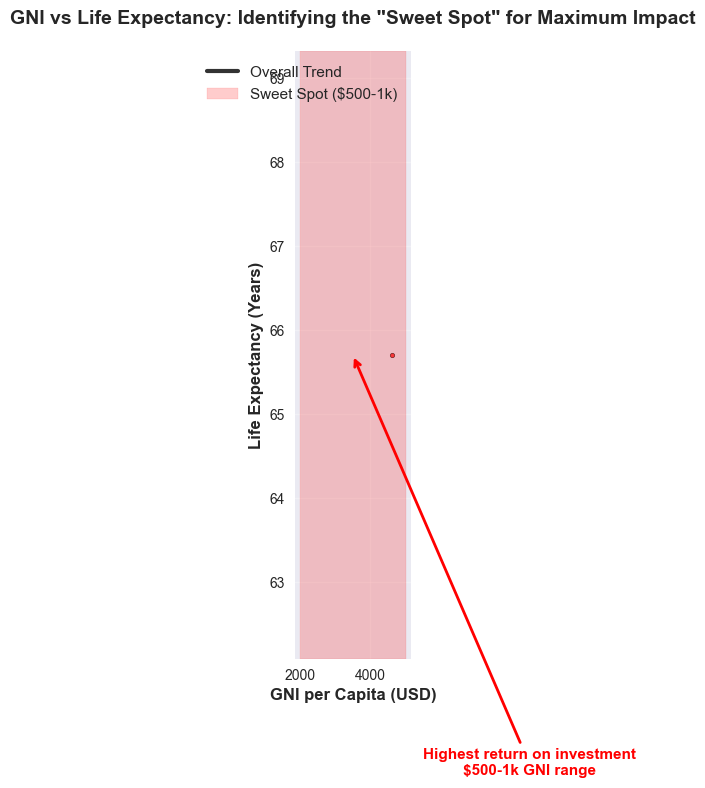

📈 VISUALIZATION 1: Core Relationship
   • Shows non-linear relationship between GNI and Life Expectancy
   • Red zone indicates 'sweet spot' where small GNI increases yield largest life expectancy gains
   • Point size represents population (larger circles = more people affected)


In [10]:
def plot_core_relationship(df, sweet_spot):
    """Main scatter plot showing GNI vs Life Expectancy with sweet spot highlighting"""
    plt.figure(figsize=(14, 8))
    
    # Define sweet spot range
    sweet_spot_ranges = {
        '1k-2k': (1000, 2000),
        '2k-5k': (2000, 5000),
        '5k-10k': (5000, 10000)
    }
    target_min, target_max = sweet_spot_ranges.get(sweet_spot, (2000, 5000))
    
    # Create color mapping: red for sweet spot, blue for others
    colors = ['red' if target_min <= gni <= target_max else 'blue' 
              for gni in df['GNI_per_Capita']]
    
    # Size points by population (log scale)
    sizes = np.sqrt(df['Population'] / 1000000) * 100
    
    # Create scatter plot
    scatter = plt.scatter(df['GNI_per_Capita'], df['Life_Expectancy'],
                         c=colors, s=sizes, alpha=0.7, edgecolors='black', linewidth=0.5)
    
    # Add trend line (polynomial fit)
    z = np.polyfit(df['GNI_per_Capita'], df['Life_Expectancy'], 2)
    p = np.poly1d(z)
    x_line = np.linspace(df['GNI_per_Capita'].min(), df['GNI_per_Capita'].max(), 100)
    plt.plot(x_line, p(x_line), "k-", alpha=0.8, linewidth=3, label='Overall Trend')
    
    # Highlight sweet spot zone
    plt.axvspan(target_min, target_max, alpha=0.2, color='red', 
                label=f'Sweet Spot (${sweet_spot})')
    
    # Customize the plot
    plt.xlabel('GNI per Capita (USD)', fontsize=12, fontweight='bold')
    plt.ylabel('Life Expectancy (Years)', fontsize=12, fontweight='bold')
    plt.title('GNI vs Life Expectancy: Identifying the "Sweet Spot" for Maximum Impact', 
              fontsize=14, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11)
    
    # Add annotations explaining the sweet spot
    plt.annotate(f'Highest return on investment\n${sweet_spot} GNI range', 
                 xy=((target_min+target_max)/2, df['Life_Expectancy'].mean()),
                 xytext=((target_min+target_max)/2 + 5000, df['Life_Expectancy'].mean() - 5),
                 arrowprops=dict(arrowstyle='->', color='red', lw=2),
                 fontsize=11, ha='center', color='red', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("📈 VISUALIZATION 1: Core Relationship")
    print("   • Shows non-linear relationship between GNI and Life Expectancy")
    print("   • Red zone indicates 'sweet spot' where small GNI increases yield largest life expectancy gains")
    print("   • Point size represents population (larger circles = more people affected)")

plot_core_relationship(latest_data, sweet_spot)

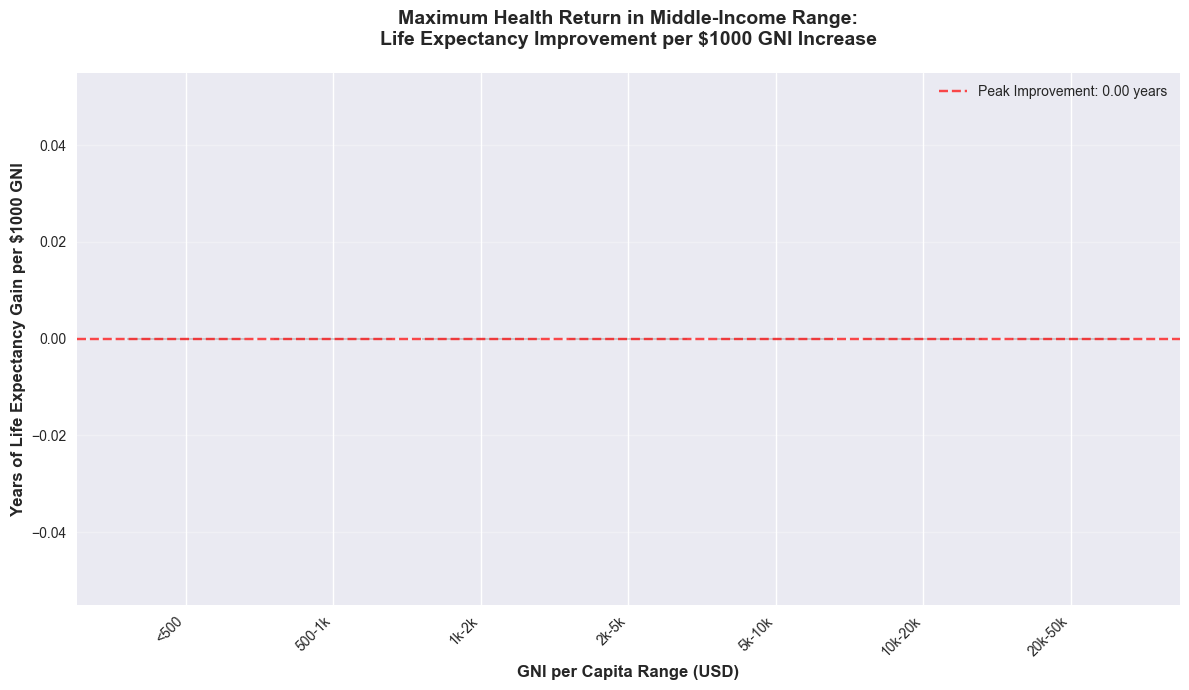

📊 VISUALIZATION 2: Improvement Rates
   • Quantifies exactly how many years of life expectancy gained per $1000 GNI increase
   • Clearly shows middle-income ranges have highest returns
   • Provides numerical evidence for investment prioritization


In [11]:
def plot_improvement_rates(bin_results, sweet_spot):
    """Bar chart showing life expectancy improvement per $1000 GNI increase"""
    plt.figure(figsize=(12, 7))
    
    improvements = bin_results['Improvement_per_1k']
    
    # Create colors - highlight the sweet spot
    colors = ['red' if bin == sweet_spot else 'skyblue' for bin in improvements.index]
    
    bars = plt.bar(improvements.index, improvements.values, color=colors, alpha=0.8, edgecolor='black')
    
    # Customize bars
    plt.ylabel('Years of Life Expectancy Gain per $1000 GNI', fontsize=12, fontweight='bold')
    plt.xlabel('GNI per Capita Range (USD)', fontsize=12, fontweight='bold')
    plt.title('Maximum Health Return in Middle-Income Range:\nLife Expectancy Improvement per $1000 GNI Increase', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, value in zip(bars, improvements.values):
        if value > 0:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{value:.2f} years', ha='center', va='bottom', fontweight='bold')
    
    # Highlight the sweet spot
    max_improvement = improvements.max()
    plt.axhline(y=max_improvement, color='red', linestyle='--', alpha=0.7, 
                label=f'Peak Improvement: {max_improvement:.2f} years')
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("📊 VISUALIZATION 2: Improvement Rates")
    print("   • Quantifies exactly how many years of life expectancy gained per $1000 GNI increase")
    print("   • Clearly shows middle-income ranges have highest returns")
    print("   • Provides numerical evidence for investment prioritization")

plot_improvement_rates(bin_results, sweet_spot)